# ASL Alphabet Classifier Test #1

#### Datasource: 
<a href="https://www.kaggle.com/grassknoted/asl-alphabet">https://www.kaggle.com/grassknoted/asl-alphabet</a>

<br>

This is a prototype, playing with FastAI using Resnet34 to classify American Sign Language alphabet.  It's basically Notebook #2 from the MOOC on a "clean" dataset.  We get great results ... but the data is really contrived.  It's highly likely the model will be overfitted, however it's a good test of the library.
<br>
<br>
<br>

In [1]:
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

plt.style.use('classic')


In [2]:
path = '../data/external/asl_alphabet_train/asl_alphabet_train'

<br>

### Create the DataBlock

In [3]:
signs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

<br>

### Load the data by path

In [4]:
dls = signs.dataloaders(path)

<br>

### Verify the Training and Validation Batches

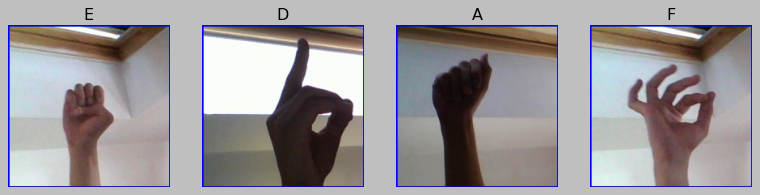

In [5]:
dls.train.show_batch(max_n=4, nrows=1)

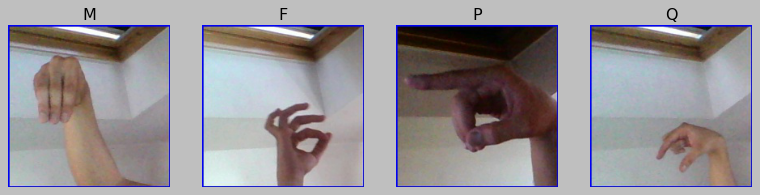

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

<br>

### Define the model (Resnet34) and fit

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.102996,0.039773,0.012529,03:00


epoch,train_loss,valid_loss,error_rate,time
0,0.027030,0.022895,0.006437,04:20
1,0.003628,0.003268,0.001207,04:15
2,0.002009,0.000087,0.000000,04:14
3,0.000037,0.000014,0.000000,04:15


<br>

### Visualize with a confusion Matrix

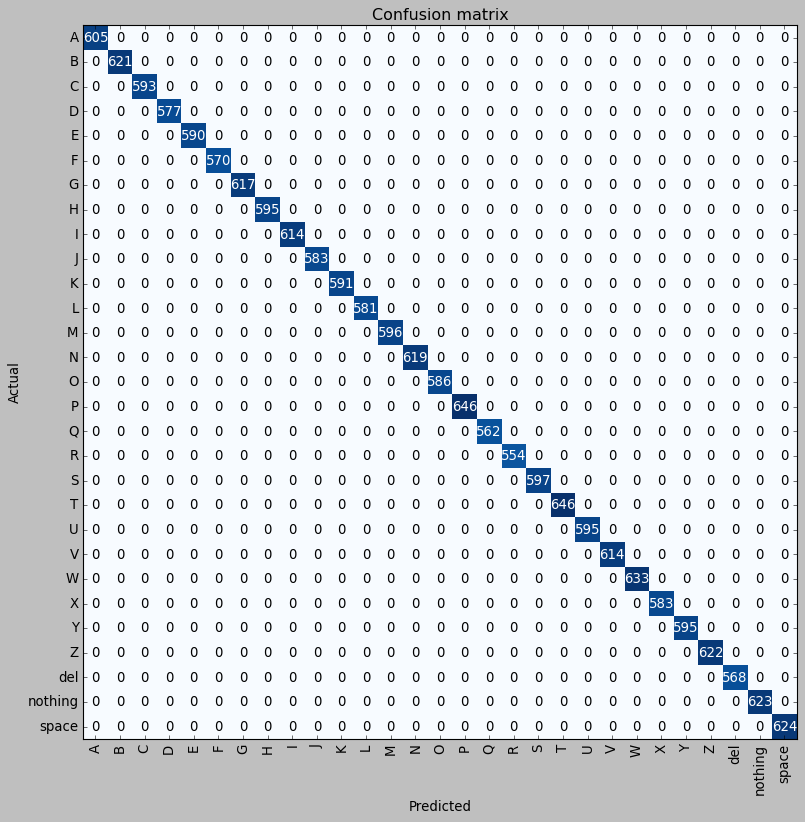

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

<br>

### Show the top 5 most error prone images

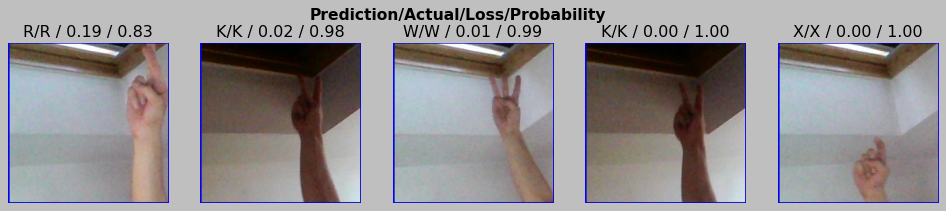

In [9]:
interp.plot_top_losses(5, nrows=1)